# 1. 자연어 처리
- 자연어(사람들이 일상적으로 사용하는 언어)처리
- 자연어 처리 하는 분야
    -자연어 이해: 형태소 분석 -> 의미분석 -> 대화분석
    -자연어 생성 : 대화분석 -> 다음 문장이나 단어 출력
- 활용 분야: 맞춤법 검사, 번역기, 검색엔진, 키워드 분석

# 2. 자연어 처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 품사 태깅 
- 제약 조건(불용어 처리), 규칙 확인
- 분석

# 3. 한글 형태소 분석 엔진
- KoNLPy: 파이썬용
- KOMORAN: 자바로 만든 형태소 분석기(JAVA_HOME 시스템 변수)
- HanNanum: 자바로 만든 형태소 분석기(JAVA_HOME 시스템 변수)
- Kkma : 서울대학교 연구실에서 만듬 
- KoNLP: R용 자연어처리기    

In [1]:
pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl

Processing e:\kim_jiwon\src\09_자연어처리\jpype1-1.2.0-cp38-cp38-win_amd64.whl
JPype1 is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# KoNLPy 패키지 인스톨

In [2]:
text="아름답지만 다소 복잡하기도 한 한국어는 전 세게에서 13번째로 많이 사용되는 언어입니다."

# 3.1 HanNanum

In [9]:
from konlpy.tag import Hannanum
han=Hannanum()
han.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전', 'mma')],
  [('전', 'nbn')],
  [('전', 'nbu')],
  [('전', 'ncn')],
  [('절', 'pvg'), ('ㄴ', 'etm')]],
 [[('세게', 'ncn'), ('에서', 'jca')],
  [('세게에', 'ncn'), ('서', 'jca')],
  [('세게에서', 'ncn')],
  [('세게', 'nqq'), ('에서', 'jca')],
  [('세게에', 'nqq'), ('서', 'jca')],
  [('세게에서', 'nqq')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 

https://konlpy.org <br>
    api -> 그보다 위쪽에 Comparison between POS tagging classes 클릭 <br>
    -> Korean POS tags comparison chart 클릭 후 다른 이름으로 저장 <br>

In [5]:
# 형태소 문석만

In [10]:
han.morphs(text)

['아름답',
 '지만',
 '다소',
 '복잡',
 '하',
 '기',
 '도',
 '하',
 'ㄴ',
 '한국어',
 '는',
 '전',
 '세게',
 '에서',
 '13번',
 '째',
 '로',
 '많',
 '이',
 '사용',
 '되',
 '는',
 '언어',
 '이',
 'ㅂ니다',
 '.']

In [16]:
# 품사 태깅
print(han.pos(text,ntags=9)) #디폴트가 ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전', 'N'), ('세게', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]


In [19]:
#텍스트 중에 형용사만 추출해보기
tagged_text=han.pos(text,ntags=22)
l=[]
for t in tagged_text:
    if t[1]=='PA':
        l.append(t[0])
        
l

['아름답', '많']

In [20]:
[t[0] for t in tagged_text if t[1]=='PA']

['아름답', '많']

In [21]:
#명사만 추출
han.nouns(text)

['복잡', '한국어', '전', '세게', '13번', '사용', '언어']

In [ ]:
# kkma

In [26]:
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size=1024) #ㅎ비메모리 사이즈 늘릴 때 사용
print(kkma.morphs(text)) #형태소 분석만

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세', '게', '에', '서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [27]:
print(kkma.pos(text)) #ntags 기본값은 30 

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'NNG'), ('세', 'VA'), ('게', 'ECD'), ('에', 'VV'), ('서', 'ECD'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [28]:
#보통명사만 추출
tagged_text = kkma.pos(text,56)
[t[0] for t in tagged_text if t[1]=='NNG']

['복잡', '한국어', '전', '사용', '언어']

In [29]:
# 명사들 다 추출
kkma.nouns(text)

['복잡', '한국어', '전', '13', '13번째', '번째', '사용', '언어']

In [ ]:

# komoran

In [7]:
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size=2048) # 힙메모리: 변수를 저장하는 메모리. 
print(komoran.morphs(text)) #형태소 분석만

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세', '게', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [8]:
print(komoran.nouns(text))

['한국어', '번', '사용', '언어']


In [9]:
print(komoran.pos(text))

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'MM'), ('세', 'VV'), ('게', 'EC'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [12]:
# 일반 명사(NNG)만 추출
tagged_text = komoran.pos(text)
[t[0] for t in tagged_text if t[1]== 'NNG']

['사용', '언어']

In [ ]:
# 4. 말뭉치

In [14]:
print(r'Hello\nWorld') # r = row data
print('Hello\nWorld')

Hello\nWorld
Hello
World


In [20]:
from konlpy.corpus import kolaw
data=kolaw.open("constitution.txt").read()
len(data)
print(data[:20])

대한민국헌법

유구한 역사와 전통에 


In [22]:
from konlpy.corpus import kobill
data1=kobill.open('1809892.txt').read()[:1000]
data1

'교육공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9892\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  현행 교육공무원의 육아휴직은 만 6세 이하의 초등학교 취학 전 자\n\n녀의 육아를 위한 경우로 한정되어 있어 초등학교 취학 후 등하교 및 \n\n방과 후 양육 등에 어려움이 많고, 저학년 자녀 혼자 등하교를 하거나 \n\n어른 없는 집에서 지내다가 성폭력 범죄 등 흉악범죄의 피해자가 되\n\n고 있음. \n\n  이에 육아휴직 가능 시기를 만 8세 이하의 자녀로 확대하여 자녀가 \n\n초등학교에 입학하여 학교생활에 순조롭게 적응할 수 있는 나이까지 \n\n교육공무원이 자녀양육을 위해서 휴직할 수 있도록 하려는 것임(안 제\n\n44조제1항제7호). \n\n- 1 -\n\n\x0c법률  제        호\n\n교육공무원법 일부개정법률안\n\n교육공무원법 일부를 다음과 같이 개정한다.\n\n제44조제1항제7호 중 “자녀(만 6세 이하의 초등학교 취학 전 자녀)”를 \n\n“만 8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자\n\n녀”로 한다.\n\n제45조제1항제6호 중 “1년 이내로 한다. 다만, 여자 교육공무원의 경\n\n우 任用權者는 2年의 범위내에서 그 休職期間을 연장할 수 있다.”를 \n\n“1년 이내(여자 교육공무원 3년 이내)로 하되, 분할하여 휴직할 수 있\n\n다.”로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n第44條(休職) ① 敎育公務員이 다\n\n第44條(休職) ① ---------------\n\n음 각 호의 어느 하나에 해당\n\n----------------------------\n\n하

In [ ]:
# 5. 워드 클라우드

In [23]:
type(data)

str

In [28]:
i = 20
print("i={:2}".format(i))
print("i=%d" %(i))

i=20
i=20


In [30]:
#명사 전체 추출
word_list = komoran.nouns("%r" % data) # s가 아닌 r을 써야한다.
word_list

['대한민국',
 '헌법',
 '유구',
 '한',
 '역사',
 '전통',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '평화',
 '통일',
 '사명',
 '입각',
 '정의',
 '인도',
 '동포애',
 '민족',
 '단결',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유',
 '민주',
 '기본',
 '질서',
 '정치',
 '경제',
 '사회',
 '문화',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '균등',
 '향상',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '우리들의',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '다짐',
 '년',
 '7월 12일',
 '제정',
 '차',
 '개정',
 '헌법',
 '국회',
 '의결',
 '국민',
 '투표',
 '개정',
 '장',
 '강',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '권력',
 '국민',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '바',
 '재외국민',
 '보호',
 '의무',
 '대한민국',
 '영토',
 '한반도',
 '부속',
 '도서',
 '대한민국',
 '통일',
 '지향',
 '자유',
 '민주',
 '기본',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '대한민국',
 '국제',
 '평화',
 '유지',
 '노력',
 '침략',
 '전쟁',
 '부인',
 '국군',
 '국가',
 '안전',
 '보장',
 '국토방위',
 '신성',
 '의무',
 '

In [33]:
print('명사 출현 수: ',len(word_list))
print('명사 종류 수: ',len(set(word_list)))
print('단어당 평균반복수 종류 수: ',len(word_list)/len(set(word_list)))

명사 출현 수:  3361
명사 종류 수:  891
단어당 평균반복수 종류 수:  3.772166105499439


In [34]:
print(word_list[:20])

['대한민국', '헌법', '유구', '한', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주개혁']


In [35]:
text = ' '.join(word_list)
text[:200]

'대한민국 헌법 유구 한 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불의 타파 자율 조화 바탕 자유 민주 기본 질서 정치 경제 사회 문화 영역 각인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 안 국민 생활 균등 향상 밖 항구 세계 평화 인'

In [ ]:
#아나콘다 프롬프트에서아나콘다 프롬프트에서 pip install WordCloud 하기

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

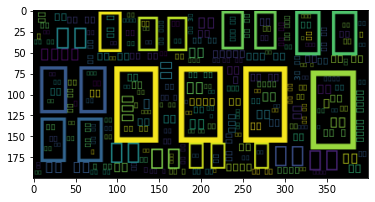

In [39]:
wordc = WordCloud()
wordc.generate(text)
plt.figure()
plt.imshow(wordc,interpolation = 'bilinear')

In [42]:
wordc = WordCloud(background_color='white',
                 max_words=300,
                 font_path="c:/Windows/fonts/malgun.ttf",
                 relative_scaling=0.2)
wordc.generate(text)

(-0.5, 399.5, 199.5, -0.5)

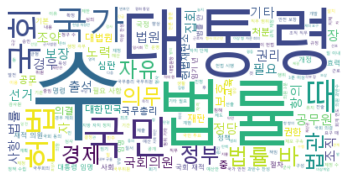

In [45]:
plt.figure()
plt.imshow(wordc,interpolation = 'bilinear')
plt.axis('off') # 축 없애기

일반명사 출현 수:  2316
일반명사 종류 수:  661
단어당 평균반복수 종류 수:  3.503782148260212
<class 'list'>


(-0.5, 399.5, 199.5, -0.5)

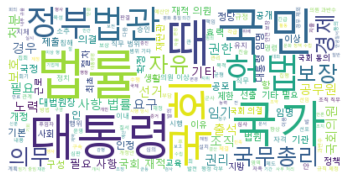

In [51]:
#일반명사만 추출일반명사만 추출
tagged_data = komoran.pos(data)
word_list=[t[0] for t in tagged_data if t[1]=="NNG"]
print('일반명사 출현 수: ',len(word_list))
print('일반명사 종류 수: ',len(set(word_list)))
print('단어당 평균반복수 종류 수: ',len(word_list)/len(set(word_list)))
print(type(word_list))
text=' '.join(word_list)
#dnjem zmffkdnem
wordc = WordCloud(background_color='white',
                 max_words=200,
                 font_path="c:/Windows/fonts/malgun.ttf",
                 relative_scaling=0.2)
wordc.generate(text)
plt.figure()
plt.imshow(wordc,interpolation = 'bilinear')
plt.axis('off')

In [52]:
# 불용어 처리 : 이 단어는 워드 클라우드 그릴 때 쓰지 마!
#(불용어 사전+불용어)

In [59]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import STOPWORDS

In [62]:
불용어= STOPWORDS | ENGLISH_STOP_WORDS | set(['대통령','법관'])
불용어= set(['대통령','법관']) #반드시 set으로 넣을 것

(-0.5, 399.5, 199.5, -0.5)

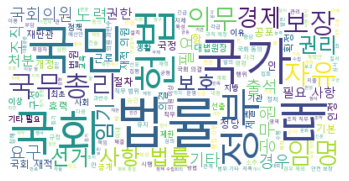

In [63]:
wordc = WordCloud(background_color='white',
                 max_words=200,
                 font_path="c:/Windows/fonts/malgun.ttf",
                 relative_scaling=0.2,
                 stopwords=불용어)
wordc.generate(text)
plt.figure()
plt.imshow(wordc,interpolation = 'bilinear')
plt.axis('off')

In [64]:
import os
os.getcwd()

'E:\\kim_jiwon\\src\\09_자연어처리'

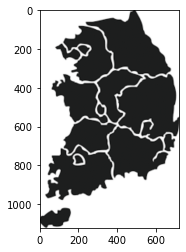

In [80]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('south_korea.png').convert('RGBA')
#png파일: "RGBA"로 
#jpg파일: "RGB"
mask = Image.new ("RGB",img.size,(0,0,0))
mask.paste(img)
plt.imshow(mask)
mask=np.array(mask)

(-0.5, 719.5, 1123.5, -0.5)

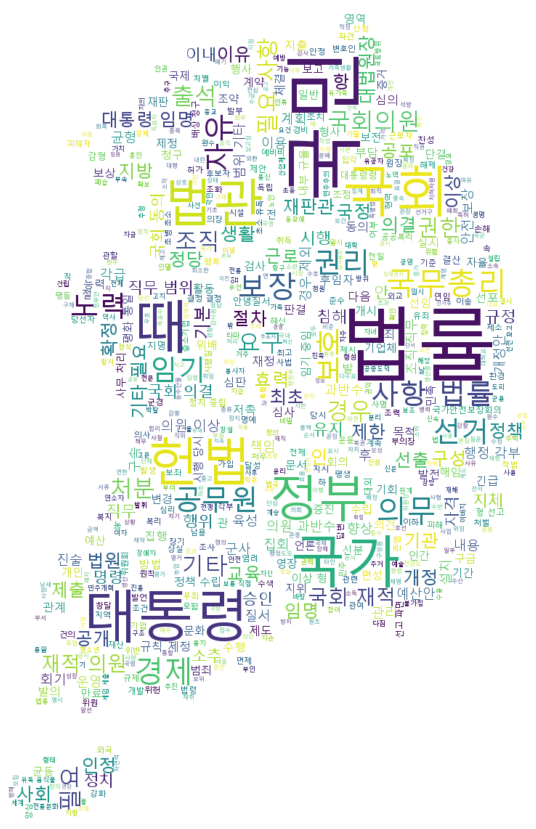

In [81]:
wordcloud = WordCloud(background_color='white',
                     max_words= 700,
                     font_path="c:/Windows/fonts/malgun.ttf",
                     relative_scaling=0.1,
                     mask=mask)
wordcloud.generate(text)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

(-0.5, 719.5, 467.5, -0.5)

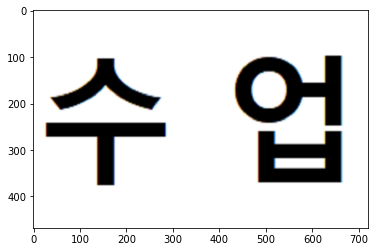

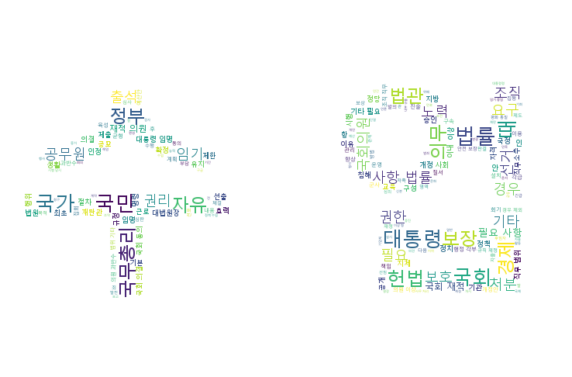

In [82]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('test.png').convert('RGBA')
#png파일: "RGBA"로 
#jpg파일: "RGB"
mask = Image.new ("RGB",img.size,(0,0,0))
mask.paste(img)
plt.imshow(mask)
mask=np.array(mask)
wordcloud = WordCloud(background_color='white',
                     max_words= 700,
                     font_path="c:/Windows/fonts/malgun.ttf",
                     relative_scaling=0.1,
                     mask=mask)
wordcloud.generate(text)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

In [ ]:
# 단어 빈도수 계산

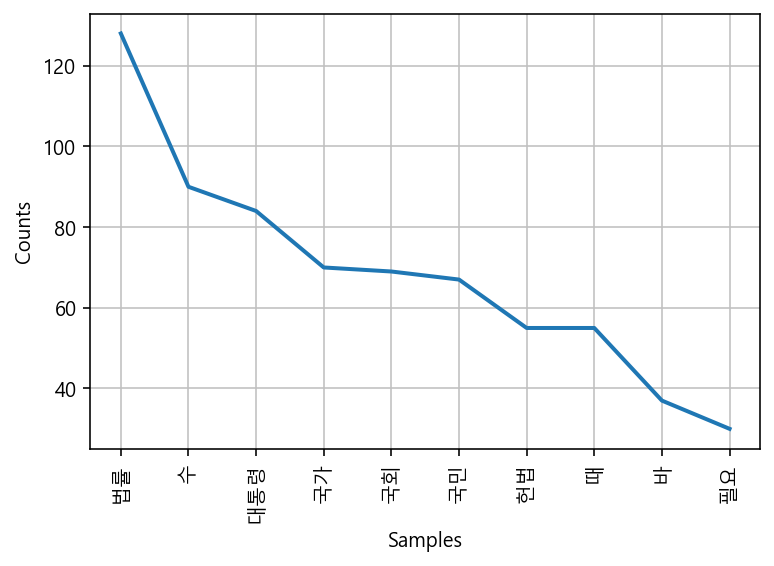

In [89]:
import nltk
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rc("font", family ="malgun gothic")
word_list=komoran.nouns(data)
nltk.Text(word_list).plot(10)

# 7. 워드 임베딩
- 단어간 유사성 도출

In [2]:
# 뉴스 기사 link들 list 가져오기
#https://fs.jtbc.joins.com//RSS/economy.xml
import requests
from bs4 import BeautifulSoup
rss_url = "https://fs.jtbc.joins.com//RSS/economy.xml"
jtbc_economy = requests.get(rss_url)
economy_soup = BeautifulSoup(jtbc_economy.content,"xml")
economy_soup
link_list = economy_soup.select('item > link')
link_list = [link.text for link in link_list]
link_list

['https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997856',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997858',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997873',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997839',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997816',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997838',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997841',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997663',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997660',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997664',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997622',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997623',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997533',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB119

In [6]:
# 뉴스 기사를 명사들만 뽑아 워드 임베딩하기 좋게 만들기.
from konlpy.tag import Kkma
kkma = Kkma()
news=[]

for link in link_list:
    news_response = requests.get(link)
    news_soup = BeautifulSoup(news_response.content,"html.parser")
    news_title = news_soup.select_one('h3#jtbcBody')
    news_content = news_soup.select_one('div#articlebody > div.article_content')
    content = news_title.text+' '+news_content.text
    news.append(kkma.nouns(content))

In [7]:
print(news[:2])

[['주택', '처분', '처분하라', '하라', '용도', '용도변경', '변경', '의원', '꼼수', '절세', '의혹', '앵커', '공직자', '재산', '이번', '공개', '정부', '여당', '집이', '2', '2채', '채', '이상', '이후', '집', '경우', '주택자', '소식', '상가', '국회의원', '여럿', '김', '연', '기자', '보도', '서울', '명일', '명일동', '동', '다세대', '민주당', '최종', '최종윤', '윤', '이곳', '1', '1층', '층', '얼마', '전', '근린', '근린생활시설', '생활', '시설', '최', '전셋집', '본인', '소유', '현장', '흔적', '씨', '인근', '상점', '주인', '옆', '지금', '호로', '거', '사람', '3', '3년', '년', '이사', '나', '적', '올해', '재산공개', '약속', '명', '당의', '유기', '유기홍', '홍', '배우자', '명의', '인천', '강화', '강화군', '군', '단독', '단독주택', '1주택자', '당', '임종', '방식', '1채', '지난해', '고위', '고위공직자', '1가구', '가구', '1주택', '보유', '권유', '물론', '건', '국민', '힘', '김미애', '미', '애', '부산', '아파트', '건물', '신고', '절차', '주택자가', '자가', '하면', '수가', '종합', '종합부동산세', '부동', '산세', '때', '중과', '양도', '양도세', '세', '수', '전문가', '로', '의심', '지적', '권', '권대중', '대중', '명', '명지대', '지대', '부동산', '부동산학과', '학과', '교수', '이하', '일반', '주거', '주거지역', '지역', '건', '불법', '약', '거지', '세금', '절세방법', '방법', '이용', '인턴', '인턴기자', '영'], ['신도시', '발표', '땅',

In [11]:
# 워드 임베딩하기
from gensim.models import Word2Vec
model=Word2Vec(news,size=100,window=5,min_count=2,workers=-1)

In [12]:
model.wv.most_similar("코로나")

[('상식', 0.32195591926574707),
 ('건설', 0.3171466588973999),
 ('고용', 0.28070345520973206),
 ('총수', 0.25884631276130676),
 ('조원태', 0.2515299320220947),
 ('현재', 0.24146966636180878),
 ('마음', 0.23961679637432098),
 ('여파', 0.2363450825214386),
 ('연구', 0.23186606168746948),
 ('용도변경', 0.20386123657226562)]

In [13]:
model.wv.most_similar("코로나",topn=5)

[('상식', 0.32195591926574707),
 ('건설', 0.3171466588973999),
 ('고용', 0.28070345520973206),
 ('총수', 0.25884631276130676),
 ('조원태', 0.2515299320220947)]